## Notebook made by Alan Hengstmann Silva, it aims to predict the opening price for an stock in the next day, using Ridge regression to minimize overfitting and have a good precision.

## Importing Libraries to Handle Data

In [100]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Store today, yesterday datetimes and stock name

In [102]:
today = datetime.date.today()
yesterday = today - datetime.timedelta(days=1)
stock = "USIM5" + ".SA"
#Final ".SA" is necessary due to yahoo finance api data.

## Read Data from Yahoo Finance API and Setup Values

In [103]:
ATIVO = data.DataReader(stock, 'yahoo', end=yesterday)
ATIVO1D = data.DataReader(stock, 'yahoo', end=datetime.date.today())
ATIVOtoday = data.DataReader(stock, 'yahoo', datetime.date.today())
if ATIVO['Open'].count() != ATIVO1D[1:]['Open'].count():
    yesterday = today - datetime.timedelta(days=2)
    ATIVO = data.DataReader(stock, 'yahoo', end=yesterday)

## Divide data between testing and training

In [75]:
X = ATIVO.drop(['Open'], axis=1)
y = ATIVO1D[1:]['Open']

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

L2 Regularization
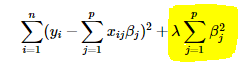
Used to avoid overfitting, reduce standard errors

## Applying Ridge Regression Model

In [104]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(ATIVO1D.drop(['Open'], axis=1))
predictionTest = model.predict(X_test)

c:\users\ahs467\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.93393e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [113]:
print("Random Regressor ", stock, "Yesterday: R$", ATIVO['Adj Close'][-1])
print ("Previsão: ", pred[-1], '\t', 'Variação:' ,((((pred[-1] - ATIVO['Adj Close'][-1])/pred[-1])*100)),'%')

Random Regressor  USIM5.SA Yesterday: R$ 17.100000381469727
Previsão:  16.87228853150625 	 Variação: -1.3496204118265398 %


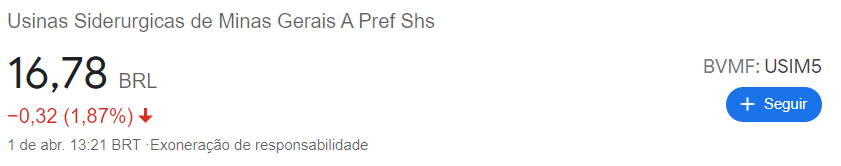

# The model worked as a forecast of USIM5 Stock on April 1, 2021.

## Metrics Evaluation

In [106]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

In [118]:
R2 = r2_score(y_test, predictionTest)
MAE = mean_absolute_error(y_test, predictionTest)
MSE = mean_squared_error(y_test, predictionTest, squared=False)
RMSE= mean_squared_error(y_test, predictionTest, squared=True)
print("R2: ", R2)
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE, '\n')
print("Model Score in train data: ", model.score(X_train, y_train))
print("Model Score in test data: ", model.score(X_test, y_test))

R2:  0.9985033102427052
MAE:  0.08471466219359575
MSE:  0.12958901696696534
RMSE:  0.01679331331846443 

Model Score in train data:  0.9982070781695168
Model Score in test data:  0.9985033102427052


## Scatter diagram

Text(0, 0.5, 'Prediction Open')

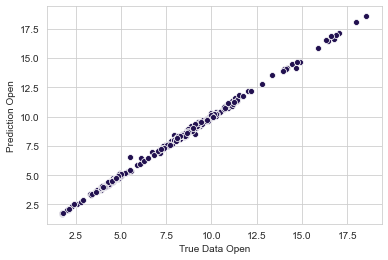

In [141]:
sns.set_style('whitegrid')
sns.set_palette("magma")
sns.scatterplot(y_test, predictionTest)
plt.xlabel('True Data Open')
plt.ylabel('Prediction Open')

## Distribuition - Residual

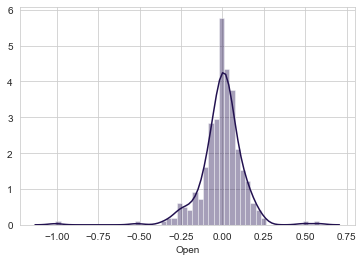

In [140]:
sns.distplot((y_test-predictionTest),bins=50)